In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df_combine = pd.read_csv('data/combined_data/combined_data.csv')

In [3]:
df_combine.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19,59,0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,0,6.9,3.3,7.6,239.695455
2,24,31.8,16.9,51,0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46,0,6.9,3.3,5.4,223.208333


In [4]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
T         561 non-null object
TM        561 non-null object
Tm        561 non-null object
H         561 non-null object
PP        561 non-null object
VV        561 non-null object
V         561 non-null object
VM        561 non-null object
PM_2_5    561 non-null float64
dtypes: float64(1), object(8)
memory usage: 39.5+ KB


In [8]:
for col in df_combine.columns[:-1]:
    df_combine[col] = pd.to_numeric(df_combine[col], errors='coerce')

In [9]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
T         558 non-null float64
TM        558 non-null float64
Tm        558 non-null float64
H         558 non-null float64
PP        543 non-null float64
VV        558 non-null float64
V         558 non-null float64
VM        552 non-null float64
PM_2_5    561 non-null float64
dtypes: float64(9)
memory usage: 39.5 KB


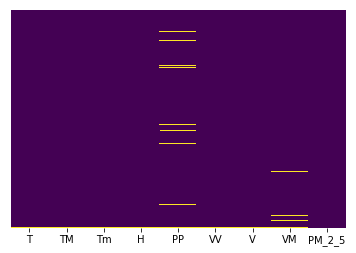

In [10]:
sns.heatmap(df_combine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df_combine.isna().sum()

T          3
TM         3
Tm         3
H          3
PP        18
VV         3
V          3
VM         9
PM_2_5     0
dtype: int64

In [13]:
df = df_combine.dropna()

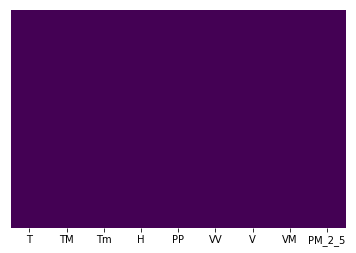

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df.shape

(537, 9)

In [17]:
df['PM_2_5'].value_counts()

0.000000      15
79.000000      3
212.125000     2
30.625000      2
37.625000      2
71.666667      2
33.166667      2
47.416667      2
107.625000     2
43.041667      2
110.875000     2
30.666667      2
28.375000      2
48.125000      2
65.375000      2
149.625000     2
65.166667      2
80.041667      2
108.333333     1
57.125000      1
120.208333     1
157.500000     1
27.411765      1
85.944444      1
302.458333     1
98.478261      1
319.737500     1
268.869565     1
77.750000      1
43.958333      1
              ..
226.521739     1
19.833333      1
185.083333     1
43.333333      1
126.583333     1
56.291667      1
278.333333     1
181.012500     1
245.916667     1
179.116667     1
83.210526      1
63.666667      1
110.416667     1
258.157895     1
45.666667      1
75.166667      1
119.416667     1
236.416667     1
25.347826      1
205.125000     1
82.875000      1
32.958333      1
69.708333      1
136.750000     1
231.250000     1
64.875000      1
111.958333     1
210.875000    

In [20]:
# Drop rows where PM2.5 is 0.0
df = df[df['PM_2_5'] != 0.0] 

# Pairplot


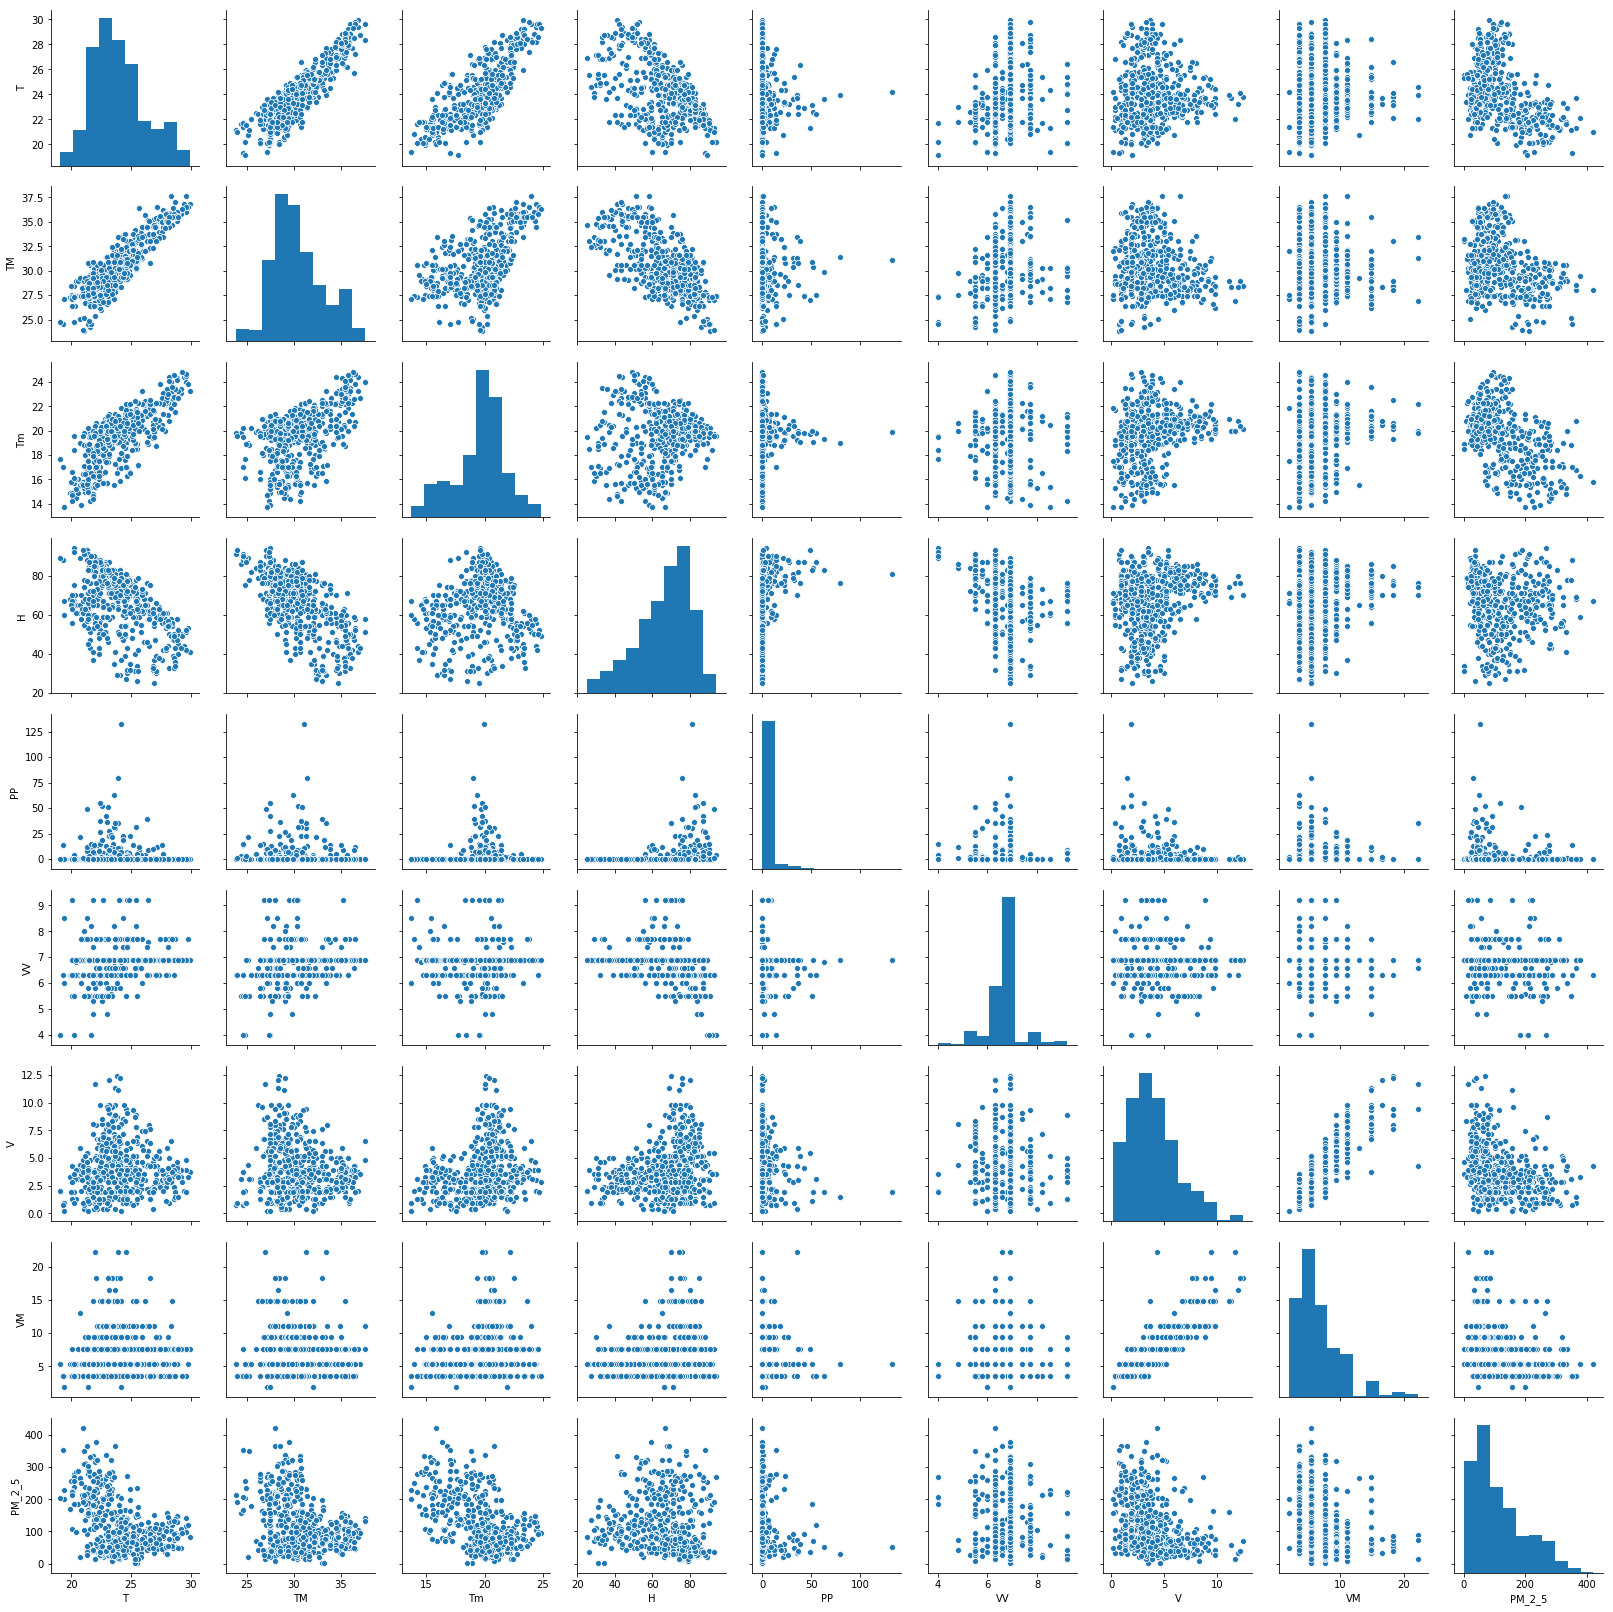

In [21]:
sns.pairplot(df)

# Correaltion


In [22]:
df.corr()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
T,1.000000,0.886066,0.754669,-0.485987,-0.066337,0.265192,0.037140,0.038449,-0.408419
TM,0.886066,1.000000,0.486710,-0.667174,-0.045421,0.263024,-0.134021,-0.089428,-0.251422
Tm,0.754669,0.486710,1.000000,0.120643,0.024127,0.034922,0.271600,0.248564,-0.514636
H,-0.485987,-0.667174,0.120643,1.000000,0.270014,-0.303661,0.278017,0.257704,-0.128596
PP,-0.066337,-0.045421,0.024127,0.270014,1.000000,-0.068208,-0.091420,-0.050060,-0.126596
VV,0.265192,0.263024,0.034922,-0.303661,-0.068208,1.000000,-0.008328,-0.041237,-0.119884
V,0.037140,-0.134021,0.271600,0.278017,-0.091420,-0.008328,1.000000,0.842111,-0.371244
VM,0.038449,-0.089428,0.248564,0.257704,-0.050060,-0.041237,0.842111,1.000000,-0.346540
PM_2_5,-0.408419,-0.251422,-0.514636,-0.128596,-0.126596,-0.119884,-0.371244,-0.346540,1.000000


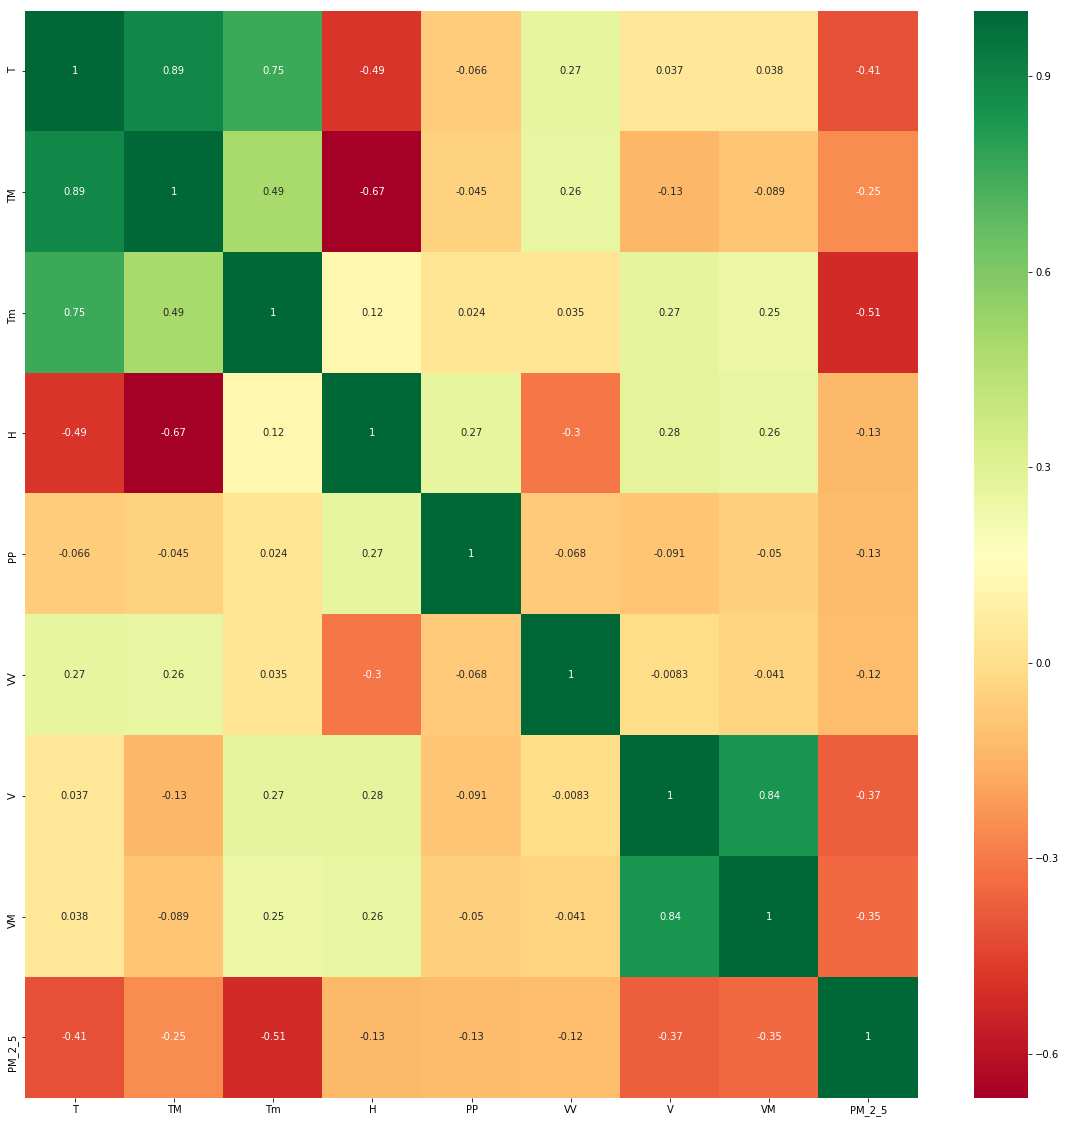

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

# Feature Importance

In [26]:
from sklearn.ensemble import ExtraTreesRegressor

In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
model = ExtraTreesRegressor()
model.fit(X,y)

/home/ind/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
model.feature_importances_

array([0.21891217, 0.09292689, 0.25388926, 0.11162016, 0.0530857 ,
       0.07202318, 0.11306487, 0.08447777])

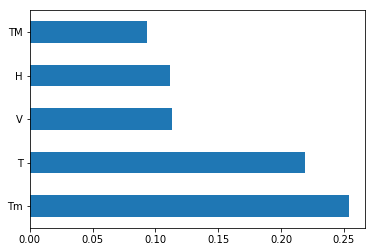

In [32]:
pd.Series(model.feature_importances_, index=X.columns).nlargest(5).plot(kind='barh')

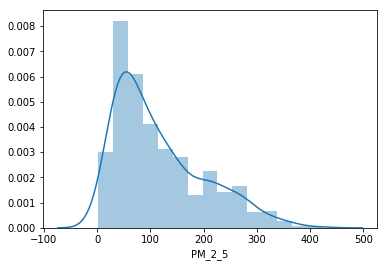

In [33]:
sns.distplot(y)

In [35]:
df.to_csv('data/combined_data/cleaned_data_1.csv',index=None)